In [32]:
import glob
import os
import tempfile
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
from metpy.plots import USCOUNTIES

from math import atan2 as atan2
from datetime import datetime

from metpy.plots import USCOUNTIES
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
from matplotlib.dates import DateFormatter, date2num
import imageio
import pyart
import nexradaws

import sage_data_client

templocation = tempfile.mkdtemp()

warnings.filterwarnings("ignore")

In [1]:
pip install act-atmos

     ---------------------------------------- 0.0/32.3 MB ? eta -:--:--
      --------------------------------------- 0.8/32.3 MB 24.4 MB/s eta 0:00:02
     - -------------------------------------- 1.0/32.3 MB 22.0 MB/s eta 0:00:02
     - -------------------------------------- 1.0/32.3 MB 22.0 MB/s eta 0:00:02
     - -------------------------------------- 1.0/32.3 MB 22.0 MB/s eta 0:00:02
     - -------------------------------------- 1.0/32.3 MB 22.0 MB/s eta 0:00:02
     - -------------------------------------- 1.0/32.3 MB 22.0 MB/s eta 0:00:02
     - -------------------------------------- 1.0/32.3 MB 22.0 MB/s eta 0:00:02
     - -------------------------------------- 1.0/32.3 MB 22.0 MB/s eta 0:00:02
     -- ------------------------------------- 1.6/32.3 MB 4.2 MB/s eta 0:00:08
     -- ------------------------------------- 2.0/32.3 MB 4.6 MB/s eta 0:00:07
     -- ------------------------------------- 2.2/32.3 MB 4.7 MB/s eta 0:00:07
     -- ------------------------------------- 2.4/3

<class 'xarray.core.dataset.Dataset'>


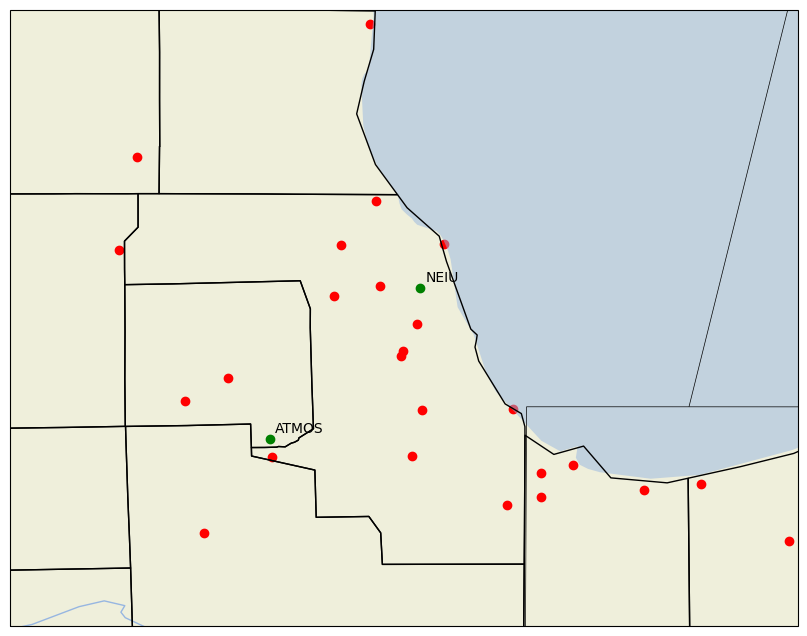

In [46]:
import os

import matplotlib.pyplot as plt

import act

# You need an account and token from https://docs.airnowapi.org/ first
token = "D7EB47D8-30DA-4E6C-AB31-3EAB5C2E78D3"

if token is not None and len(token) > 0:
    # This first example will get the forcasted values for the date passed
    # at stations within 100 miles of the Zipcode. Can also use latlon instead as
    # results = act.discovery.get_airnow_forecast(token, '2022-05-01', distance=100,
    #                                             latlon=[41.958, -88.12])
    # If the username and token are not set, use the existing sample file
    results = act.discovery.get_airnow_forecast(token, '2022-05-01', zipcode=60439, distance=100)

    # The results show a dataset with air quality information from Oklahoma City
    # The data is not indexed by time and just a rudimentary xarray object from
    # converted from a pandas DataFrame.  Note that the AirNow API labels the data
    # returned as AQI.
    # print(results)
    print(type(results))

    # This call gives the daily average for Ozone, PM2.5 and PM10
    results = act.discovery.get_airnow_obs(token, date='2023-05-24', zipcode=60439, distance=100)
    # print(results)
    # print(type(results))

    # This call will get all the station data for a time period within
    # the bounding box provided.  This will return the object with time
    # as a coordinate and can be used with ACT Plotting to plot after
    # squeezing the dimensions.  It can be a 2D time series
    lat_lon = '-88.474769,41.356063,-87.020042,42.493302'
    results = act.discovery.get_airnow_bounded_obs(
        token, '2023-05-24T00', '2023-05-25T00', lat_lon, 'OZONE,PM25', data_type='B'
    )
    # Reduce to 1D timeseries

    ## Let's make the figure
    plt.figure(figsize=(15,8))
    ax = plt.axes(projection=ccrs.PlateCarree());
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN);
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS);
    ax.add_feature(cfeature.BORDERS, linestyle=':');
    ax.coastlines(color='gray',resolution='110m');
    ax.set_extent([-88.474769, -87.020042, 41.356063,42.493302])
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m', linewidth=0.5, facecolor='none')

    ax.add_feature(states_provinces, zorder=10);
    ax.scatter(results.longitude, results.latitude, color="red", transform=ccrs.PlateCarree())
    ax.add_feature(USCOUNTIES)
    WAGGLE_SITES = {'NEIU'  : [41.980289109, -87.71703552],
                'ATMOS' : [41.701605152, -87.995196552]
               }
    ax.plot(WAGGLE_SITES["ATMOS"][1], WAGGLE_SITES["ATMOS"][0], color="Green", marker="o", transform=ccrs.PlateCarree())
    ax.text(WAGGLE_SITES["ATMOS"][1]+0.01, WAGGLE_SITES["ATMOS"][0]+0.01, "ATMOS", color="Black", transform=ccrs.PlateCarree())
    ax.plot(WAGGLE_SITES["NEIU"][1], WAGGLE_SITES["NEIU"][0], color="Green", marker="o", transform=ccrs.PlateCarree())
    ax.text(WAGGLE_SITES["NEIU"][1]+0.01, WAGGLE_SITES["NEIU"][0]+0.01, "NEIU", color="Black", transform=ccrs.PlateCarree())
    plt.savefig("EPA Stations")

In [29]:
""" Store for later use
    results = results.squeeze(dim='sites', drop=False)
    print(results)

    # Plot out data but note that Ozone was not return in the results
    display = act.plotting.TimeSeriesDisplay(results)
    display.plot('PM2.5', label='PM2.5')
    display.plot('AQI', label='AQI')
    plt.legend()
    plt.show()
"""

" Store for later use\n    results = results.squeeze(dim='sites', drop=False)\n    print(results)\n\n    # Plot out data but note that Ozone was not return in the results\n    display = act.plotting.TimeSeriesDisplay(results)\n    display.plot('PM2.5', label='PM2.5')\n    display.plot('AQI', label='AQI')\n    plt.legend()\n    plt.show()\n"